In [1]:
import pandas as pd
import csv

In [ ]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
nltk.download('all')

In [3]:
# # Converting .txt files to .csv files. It will run only one time.

# with open('SMSSpamCollection.txt', 'r') as text_file:
#     lines = text_file.readlines()

# # Open a CSV file for writing
# with open('SMSSpamCollection.csv', 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # Iterate through each line in the text file
#     for line in lines:
#         # Split the line into words
#         words = line.strip().split()

#         # Check if there are at least two words in the line
#         if len(words) >= 2:
#             # Write the first word in the first column and the rest in the second column
#             csv_writer.writerow([words[0], ' '.join(words[1:])])
#         else:
#             # Handle lines with less than two words, e.g., if the line is empty or contains only one word
#             # In this example, you can choose to skip or handle these lines as needed
#             pass


In [34]:
df = pd.read_csv('SMSSpamCollection.csv')

In [62]:
spam_df = df[df['class'] == 'spam']
print("Length of spam data :", len(spam_df))

old_ham_df = df[df['class'] == 'ham']

ham_df = old_ham_df.sample(n=747)
print("Length of New ham data :", len(ham_df))

#Made both ham and spam in equal numbers.

Length of spam data : 747
Length of New ham data : 747


In [63]:
# Merge the two DataFrames vertically (concatenate rows).
merged_df = pd.concat([spam_df, ham_df], ignore_index=True)
shuffled_df = merged_df.sample(frac=1.0, random_state=10, ignore_index=True)
Dataset = shuffled_df

In [64]:
Training_data = Dataset[0:1135]   # It is 76% data of 1494. (Total 1135 rows)
Testing_data = Dataset[1135: 1494]   # It is 24% data of 1494. (Total 359 rows)

Naive Bayes Algorithm

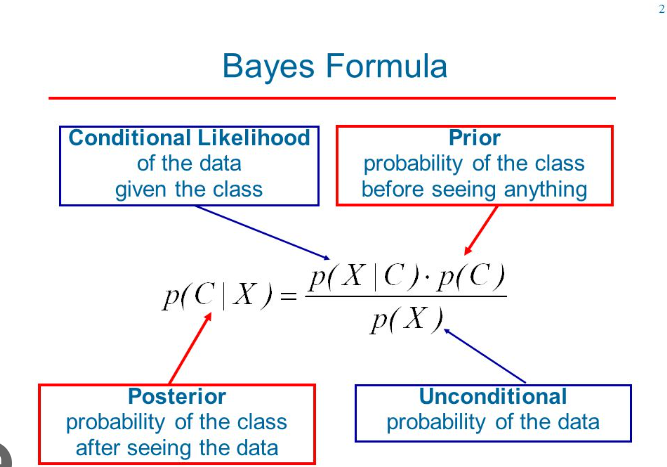

In [75]:
# In The above picture Take C = SpamText or HamText and X = Text.
# Now,
# P(Spam/Text) = ( P(Text/Spam) * P(Spam) ) / P(Text)     ------------ Equation : 1
# P(Ham/Text) = ( P(Text/Ham) * P(Ham) ) / P(Text)        ------------ Equation : 2

# Divide "Equation : 1" by "Equation : 2", If it is >= 1 Then Spam otherwise Ham.

In [70]:
# We are going to calculate probability of spam and ham
Total_Number_of_dataset = len(Dataset)
Number_of_spam_dataset = len(spam_df)
Number_of_ham_dataset = len(ham_df)

print("Probability of spam dataset :", Number_of_spam_dataset/Total_Number_of_dataset)
print("Probability of ham dataset :", Number_of_ham_dataset/Total_Number_of_dataset)

Probability of spam dataset : 0.5
Probability of ham dataset : 0.5
